In [523]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, learning_curve


In [524]:
data = pd.read_csv('/home/hasan/Desktop/DATA_SET/gender-height-weight-looksLike.csv')

In [525]:
data.head()

,Gender,Height,Weight,Looks Like
0,Male,174,96,obesity
1,Male,189,87,normal
2,Female,185,110,obesity
3,Female,195,104,overweight
4,Male,149,61,overweight


In [526]:
data.shape

(500, 4)

In [527]:
data.isnull().sum()

Gender        0
Height        0
Weight        0
Looks Like    0
dtype: int64

In [528]:
data.dtypes

Gender        object
Height         int64
Weight         int64
Looks Like    object
dtype: object

In [529]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender        500 non-null object
Height        500 non-null int64
Weight        500 non-null int64
Looks Like    500 non-null object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [530]:
#DATA ANALYSIS Height

In [531]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [532]:
count_average = pd.DataFrame(data.groupby(['Gender']).Gender.agg('count'))

#total people
total_people = data['Gender'].count()
#percent of male and female
male_percent = data[data['Gender']=='Male'].count()[0] /total_people
female_percent = data[data['Gender']=='Female'].count()[0] /total_people
#adding to the count_average dataframe
count_average['Percent'] = [female_percent,male_percent]

count_average

,Gender,Percent
Gender,,
Female,255,0.51
Male,245,0.49


In [533]:
#COUNT AND AVERAGE HEIGHT OF MALE AND FEMALE

In [534]:
male_count = data[data['Gender']=='Male']['Height'].count()
female_count = data[data['Gender']=='Female']['Height'].count()
avg_m_height = data[data['Gender']=='Male']['Height'].mean()
avg_f_height = data[data['Gender']=='Female']['Height'].mean()

df = pd.DataFrame({'count':[male_count,female_count], 'avg_height':[avg_m_height,avg_f_height]})
df = df.rename(index={0:'male',1:'female'})
df

,count,avg_height
male,245,169.648980
female,255,170.227451


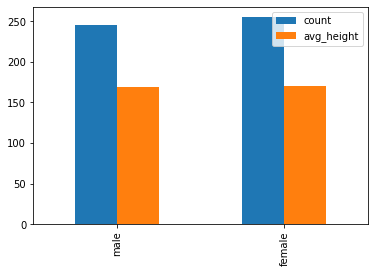

In [535]:
df.plot(kind='bar')

In [536]:
#RATIO OF MALE, FEMALE'S HEIGHT

In [537]:
data[data['Gender']=='Male']['Height'].mean()/data[data['Gender']=='Female']['Height'].mean()

0.9966017737725389

In [538]:
#RATIO OF MALE, FEMALE'S Weight

In [539]:
data[data['Gender']=='Male']['Weight'].mean()/data[data['Gender']=='Female']['Weight'].mean()

1.005830254782134

In [540]:
#DATA ANALYSIS WITH Weight

In [541]:
#COUNT AND AVERAGE HEIGHT OF MALE AND FEMALE

In [542]:
male_weight_count = data[data['Gender']=='Male']['Weight'].count()
female_weight_count = data[data['Gender']=='Female']['Weight'].count()
male_weight_mean = data[data['Gender']=='Male']['Weight'].mean()
female_weight_mean = data[data['Gender']=='Female']['Weight'].mean()

df = pd.DataFrame({'count':[male_weight_count,female_weight_count], 'avg_weight':[male_weight_mean,female_weight_mean]})
df = df.rename(index={0:'male', 1:'female'})
df

,count,avg_weight
male,245,106.314286
female,255,105.698039


Text(0.5, 1.0, 'total number of male, female and average weight')

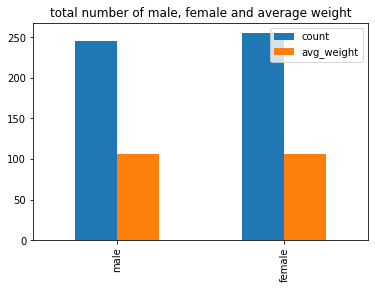

In [543]:
df.plot(kind='bar')
plt.title('total number of male, female and average weight')

In [544]:
#RATIO OF MALE'S HEIGHT AND WEIGHT

In [545]:
male_ratio_height_weight = round(data[data['Gender']=='Male']['Height'] / data[data['Gender']=='Male']['Weight'], 2)
male_ratio_height_weight

0      1.81
1      2.17
4      2.44
5      1.82
6      1.60
       ... 
487    2.34
488    1.46
494    1.55
498    1.58
499    1.32
Length: 245, dtype: float64

In [546]:
#RATIO OF FEMALE'S HEIGHT AND WEIGHT

In [547]:
female_ratio_height_weight = round(data[data['Gender']=='Female']['Height'] / data[data['Gender']=='Female']['Weight'], 2)
female_ratio_height_weight

2      1.68
3      1.88
9      1.64
11     1.99
12     1.90
       ... 
492    3.96
493    3.21
495    0.98
496    1.52
497    1.04
Length: 255, dtype: float64

In [548]:
#TOTAL NUMBER OF PEOPLE Looks Like

In [549]:
count = data['Looks Like'].value_counts()
count

extreme obesity    198
obesity            130
normal              69
overweight          68
weak                22
extremely week      13
Name: Looks Like, dtype: int64

In [550]:
#percent of every data
data['Looks Like'].value_counts(normalize=True)

extreme obesity    0.396
obesity            0.260
normal             0.138
overweight         0.136
weak               0.044
extremely week     0.026
Name: Looks Like, dtype: float64

In [551]:
#GROUPING BASED ON Looks Like and Gender

In [552]:
data.groupby(['Looks Like','Gender']).Gender.agg(['count'])

count
Looks Like      Gender       
extreme obesity Female     93
                Male      105
extremely week  Female      7
                Male        6
normal          Female     41
                Male       28
obesity         Female     71
                Male       59
overweight      Female     36
                Male       32
weak            Female      7
                Male       15

In [553]:
#FIVE MOST LONGEST PEOPLE

In [554]:
sub_data = data.loc[:,['Gender', 'Height']].sort_values(by='Height', ascending=False)
sub_data.head()

,Gender,Height
100,Male,199
160,Male,199
326,Female,199
85,Male,198
103,Female,198


In [555]:
#FIVE MOST LONGEST PEOPLE

In [556]:
sub_data = data.loc[:,['Gender', 'Weight']].sort_values(by='Weight', ascending=False)
sub_data.head()

,Gender,Weight
157,Male,160
106,Male,160
204,Male,160
330,Female,160
123,Female,160


In [557]:
#categorical to numerical

In [558]:
data['Looks Like'] = data['Looks Like'].map({'extremely week':'1', 'weak':'2', 'normal':'3', 'overweight':'4', 'obesity':'5', 'extreme obesity':'6'})

In [559]:
data['Looks Like'] = data['Looks Like'].astype(int)

In [560]:
#spliting dataset for feature and label

In [561]:
X = data.drop(['Looks Like'], axis=1)
y = data['Looks Like']

In [562]:
#Encoding the Gender column

In [563]:
encoder_ohe = ce.OneHotEncoder(cols = ['Gender'])
X = encoder_ohe.fit_transform(X)

In [564]:
X.head()

,Gender_1,Gender_2,Height,Weight
0,1,0,174,96
1,1,0,189,87
2,0,1,185,110
3,0,1,195,104
4,1,0,149,61


In [565]:
#Checking accuracy to find best algorithm

In [566]:
def find_best_algorithm(X,y):
    algos={
        'LinearRegression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False],
                'normalize':[True]
            }
        },
        'GaussianNB':{
            'model':GaussianNB(),
            'params':{
                
            }
        },
        'SVC':{
            'model':SVC(),
            'params':{
                'gamma':['auto'],
                'C':[1.0,2.0]
            }
        },
        'RandomForestClassifier':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[100,150,200],
            }
        }
    }
    
    score = []
    
    cv = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
    for name, config in algos.items():
        s = GridSearchCV(config['model'], config['params'], cv=cv)
        s.fit(X,y.values.ravel())
        
        score.append({
            'model':name,
            'best_score': s.best_score_,
            'best_params':s.best_params_
        })
        
    return pd.DataFrame(score, columns=['model','best_score','best_params'])


find_best_algorithm(X,y)

,model,best_score,best_params
0,LinearRegression,0.824595,"{'fit_intercept': False, 'normalize': True}"
1,GaussianNB,0.676800,{}
2,SVC,0.692800,"{'C': 2.0, 'gamma': 'auto'}"
3,RandomForestClassifier,0.875200,{'n_estimators': 100}


In [567]:
#splitting feature and label data for training and testing

In [568]:
Xtrain,xtest, Ytrain,ytest = train_test_split(X,y, test_size=.25, random_state=0)

In [569]:
#defining Model

In [570]:
model = RandomForestClassifier(n_estimators=150)
model.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [571]:
#predicting with xtest
predict = model.predict(xtest)
predict

array([6, 6, 5, 6, 6, 6, 4, 6, 5, 6, 3, 5, 3, 6, 6, 4, 6, 5, 6, 5, 5, 4,
       4, 5, 3, 2, 6, 5, 5, 3, 3, 6, 6, 6, 5, 1, 6, 5, 6, 3, 6, 5, 5, 5,
       5, 4, 6, 3, 6, 6, 5, 5, 4, 5, 6, 4, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5,
       3, 5, 6, 6, 6, 6, 4, 5, 5, 6, 5, 6, 6, 6, 6, 4, 5, 6, 6, 4, 6, 6,
       6, 5, 3, 3, 5, 2, 4, 2, 5, 5, 1, 4, 6, 6, 5, 5, 6, 6, 4, 6, 5, 5,
       5, 6, 4, 5, 6, 6, 6, 5, 5, 6, 3, 6, 6, 6, 6])

In [572]:
#score of the model
model.score(xtest,ytest)

0.872

In [573]:
#printing confusion matrix

Text(33.0, 0.5, 'predicted value')

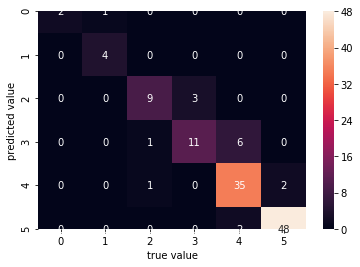

In [574]:
sns.heatmap(confusion_matrix(ytest,predict), square=False, annot=True)
plt.xlabel('true value')
plt.ylabel('predicted value')

In [575]:
#using cross_val_score

In [576]:
cross_val_score(model,X,y.values.ravel(), cv=5)

array([0.89215686, 0.85294118, 0.82178218, 0.84693878, 0.88659794])

In [577]:
#drawing Validation curve

In [578]:
pr = np.array([100,150,200,250,300])
train_scores, test_scores = validation_curve(RandomForestClassifier(), X,y, cv=5, param_name='n_estimators', param_range=pr, scoring='accuracy', n_jobs=1, error_score='raise' )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


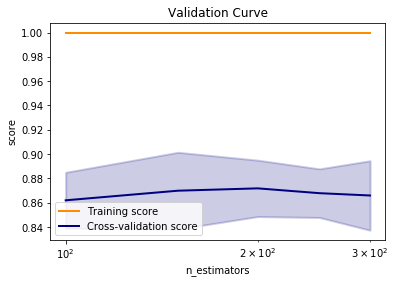

In [579]:
plt.semilogx(pr, train_mean, label="Training score", color="darkorange", lw=2)
plt.semilogx(pr, test_mean, label="Cross-validation score", color="navy", lw=2)


plt.fill_between(pr, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange", lw=2)
plt.fill_between(pr, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy", lw=2)


plt.xlabel('n_estimators')
plt.ylabel('score')
plt.title('Validation Curve')
plt.legend(loc='best')


In [580]:
##Drawing Learning Curve

In [584]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X,y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes = np.linspace(.1,1,50), verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



[learning_curve] Training set sizes: [ 39  47  54  61  69  76  83  90  98 105 112 120 127 134 142 149 156 164
 171 178 186 193 200 207 215 222 229 237 244 251 259 266 273 281 288 295
 302 310 317 324 332 339 346 354 361 368 376 383 390 398]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.8s finished


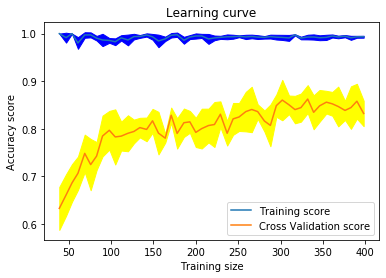

In [585]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross Validation score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = 'blue')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = 'yellow')

plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.title('Learning curve')
plt.legend(loc='best')